In [1]:
import pandas as pd
import yfinance as yf
import yahoofinancials
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Input Start and End Date
start = datetime.datetime(1980,4,26)
end = datetime.datetime(2021,7,31)

In [3]:
# download historical prices
stock = yf.download('SPY',start=start, end=end, progress=False)

In [4]:
df = stock.reset_index()

In [5]:
len(df)

7178

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,24.684113,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,24.859669,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,24.912342,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,25.175682,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,25.281021,531500


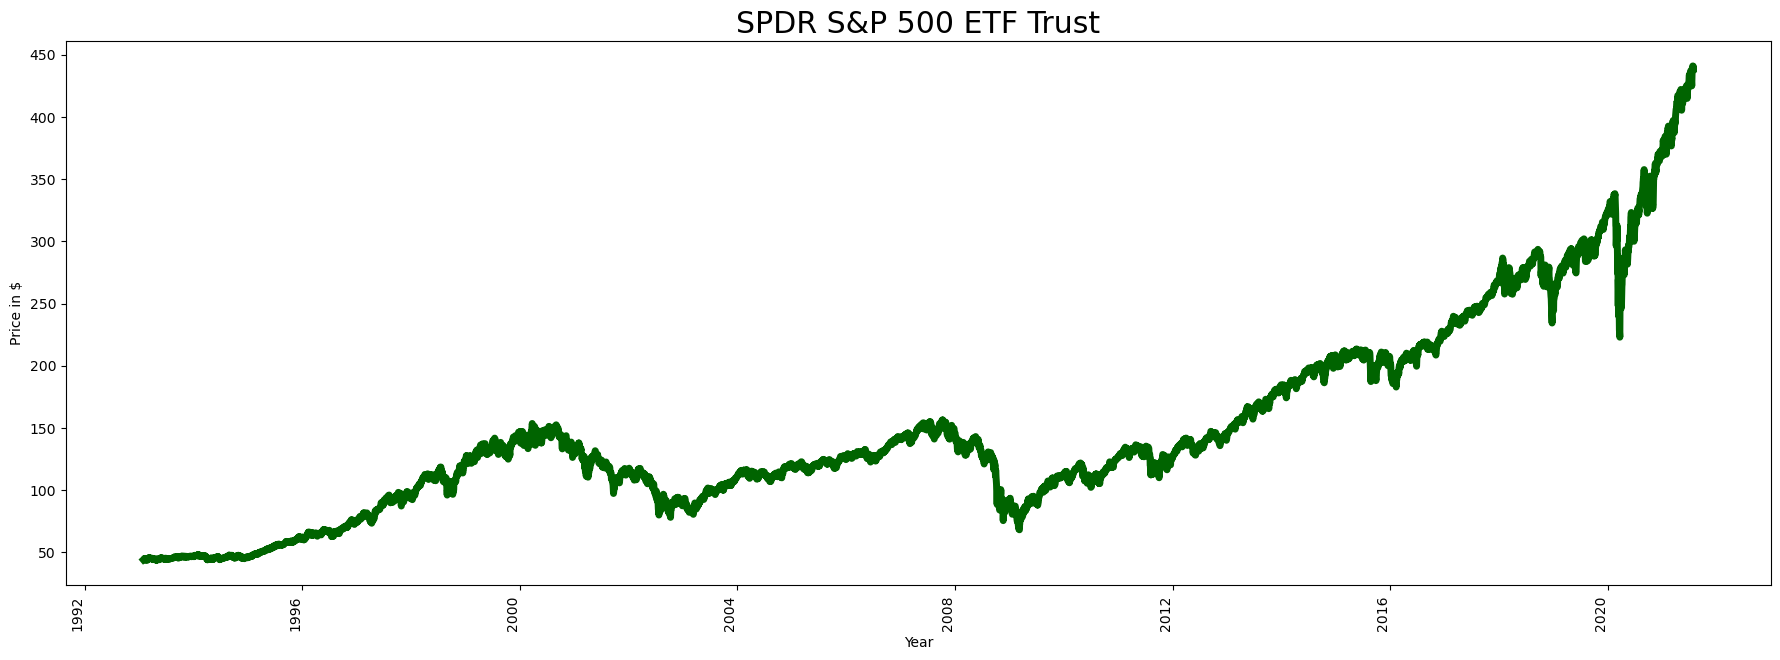

In [7]:
# plot SPY index time series

ax = df.plot(x = 'Date',y = 'Close', linewidth = 5, color = 'darkgreen')
size = plt.gcf()
ax.get_legend().remove()
size.set_size_inches(22,8)
#ax.set_xticks(np.arange(len(x)))
plt.xticks(rotation=90)

start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end, 10))
plt.rcParams.update({'font.size': 18})

plt.ylabel('Price in $')
plt.xlabel('Year')

#ax.set_xticks(np.arange(len(df.Date))) 
#ax.set_xticklabels(df.Date) 

#_ = plt.plot()

plt.title('SPDR S&P 500 ETF Trust')

plt.savefig(fname = 'SPY.jpeg', bbox_inches = 'tight')

In [8]:
df['perc_change_1day'] = (df.Close.shift(-1) - df.Close)/df.Close
df['perc_change_15day'] = (df.Close.shift(-15) - df.Close)/df.Close
df['perc_change_30day'] = (df.Close.shift(-30) - df.Close)/df.Close
df['perc_change_60day'] = (df.Close.shift(-60) - df.Close)/df.Close
df['perc_change_180day'] = (df.Close.shift(-180) - df.Close)/df.Close
df['perc_change_365day'] = (df.Close.shift(-365) - df.Close)/df.Close
df['perc_change_730day'] = (df.Close.shift(-730) - df.Close)/df.Close
df['perc_change_1095day'] = (df.Close.shift(-1095) - df.Close)/df.Close
df['perc_change_1460day'] = (df.Close.shift(-1460) - df.Close)/df.Close
df['perc_change_1825day'] = (df.Close.shift(-1825) - df.Close)/df.Close

##### Perc change in a day 

/var/folders/97/42yy7pxx1lscf6t_dhpvrff80000gp/T/ipykernel_34231/966046329.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


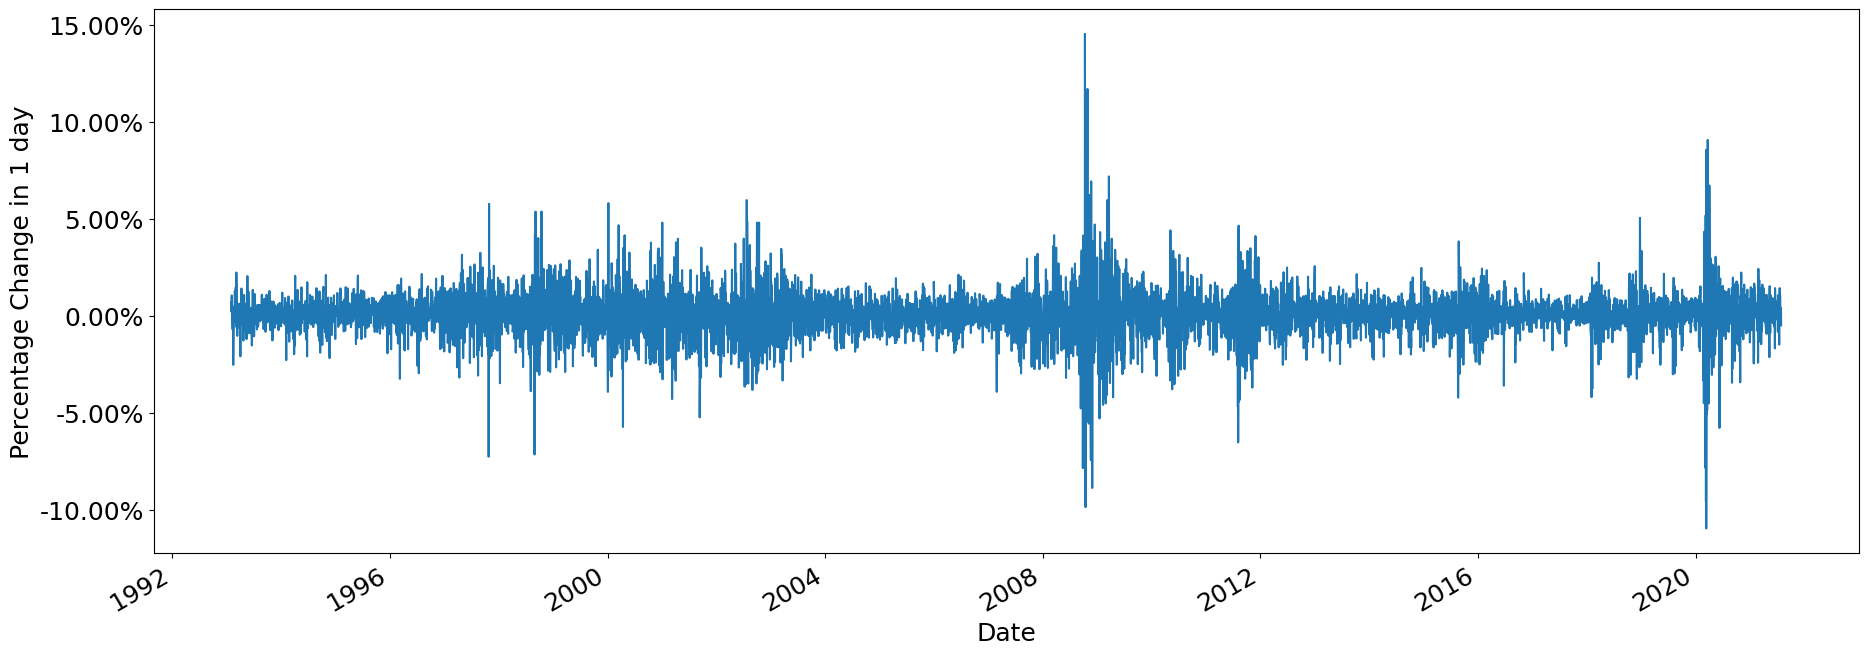

In [9]:
ax = df.sort_values('perc_change_1day').plot(y = 'perc_change_1day', x = 'Date')
plt.ylabel('Percentage Change in 1 day')
size = plt.gcf()
size.set_size_inches(22,8)

ax.get_legend().remove()

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

plt.rcParams.update({'font.size': 18})
plt.savefig(fname = 'perc_change_1_day.jpeg')

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,perc_change_1day,perc_change_15day,perc_change_30day,perc_change_60day,perc_change_180day,perc_change_365day,perc_change_730day,perc_change_1095day,perc_change_1460day,perc_change_1825day
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,24.684113,1003200,0.007112,-0.004979,0.031294,-0.001422,0.071124,0.019915,0.394381,0.938122,1.578947,2.273115
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,24.859669,480500,0.002119,-0.012712,0.024011,-0.010593,0.060734,0.014477,0.371116,0.915960,1.553672,2.214689
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,24.912342,201300,0.010571,-0.002114,0.015504,-0.008457,0.050740,0.023256,0.375264,0.905567,1.531360,2.341085
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,25.175682,529400,0.004184,-0.010460,0.011158,-0.017434,0.041144,0.012901,0.365760,0.883543,1.502092,2.268828
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,25.281021,531500,-0.000694,-0.013194,0.000694,-0.015278,0.035417,0.010417,0.366667,0.882639,1.515972,2.244444


In [11]:
#df['Date'] = pd.to_datetime(df['Date'], format= '%d/%b/%Y')
df['Date'] = df['Date'].dt.strftime('%d-%b-%Y')

##### Worst days to buy

/var/folders/97/42yy7pxx1lscf6t_dhpvrff80000gp/T/ipykernel_34231/1026861941.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


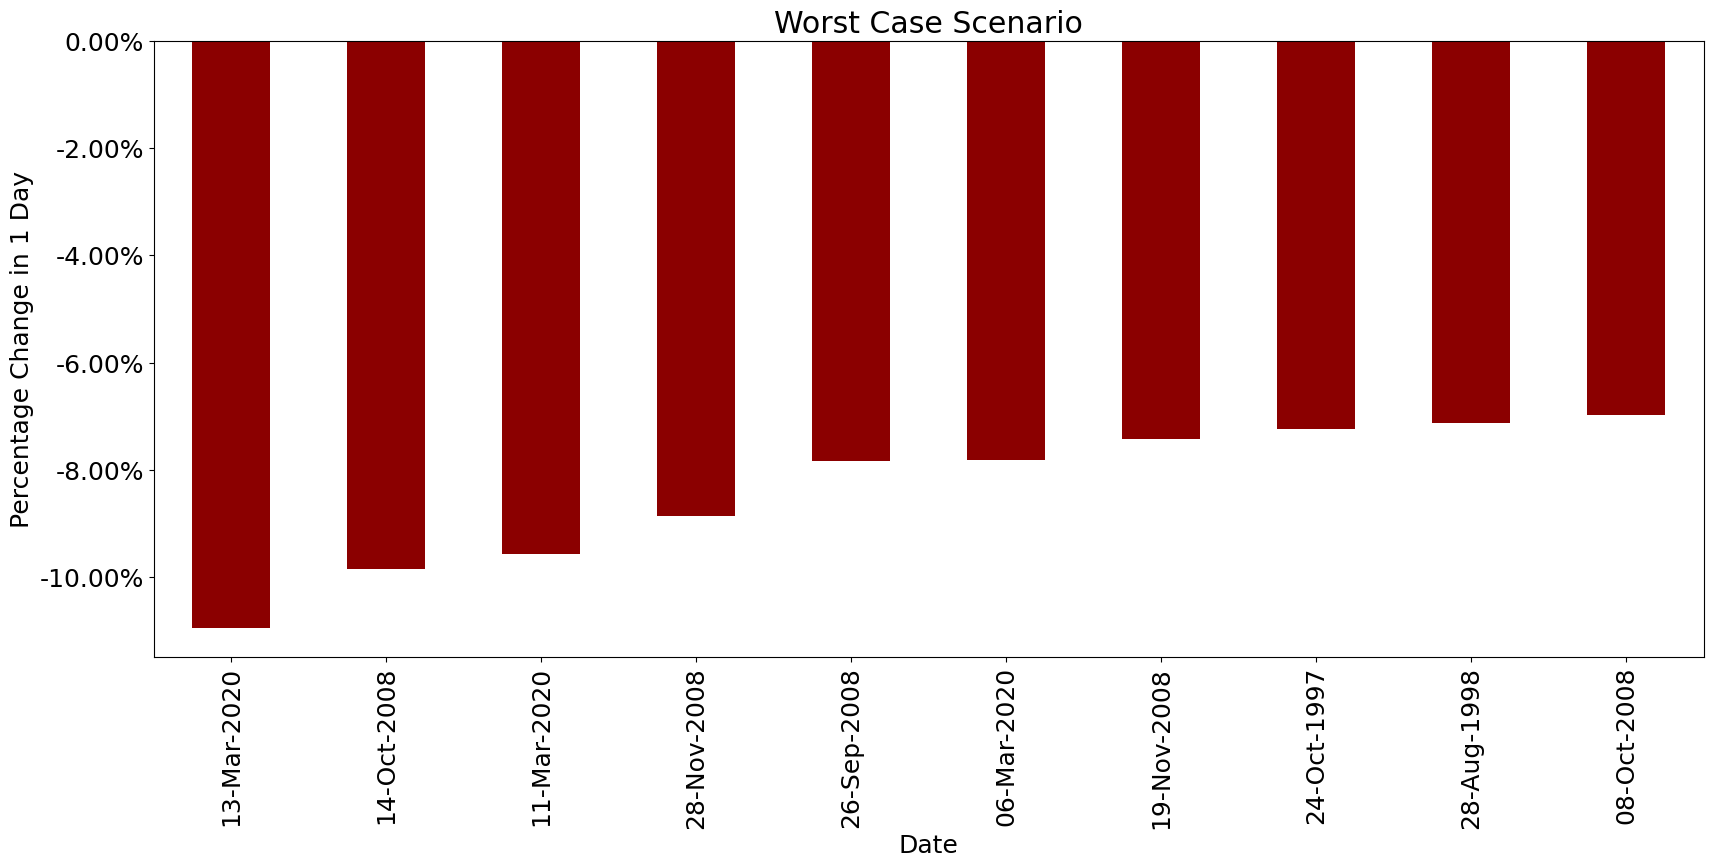

In [12]:
ax = df.sort_values('perc_change_1day').head(10).plot(y = 'perc_change_1day', x = 'Date', kind = 'bar', color = 'darkred')
size = plt.gcf()
size.set_size_inches(20,8)

plt.ylabel('Percentage Change in 1 Day')
ax.get_legend().remove()

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

plt.title('Worst Case Scenario')

plt.rcParams.update({'font.size': 18})
plt.savefig(fname = 'perc_change_1_day_top_worst.jpeg', bbox_inches = 'tight')

##### Best days to buy

/var/folders/97/42yy7pxx1lscf6t_dhpvrff80000gp/T/ipykernel_34231/658886102.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


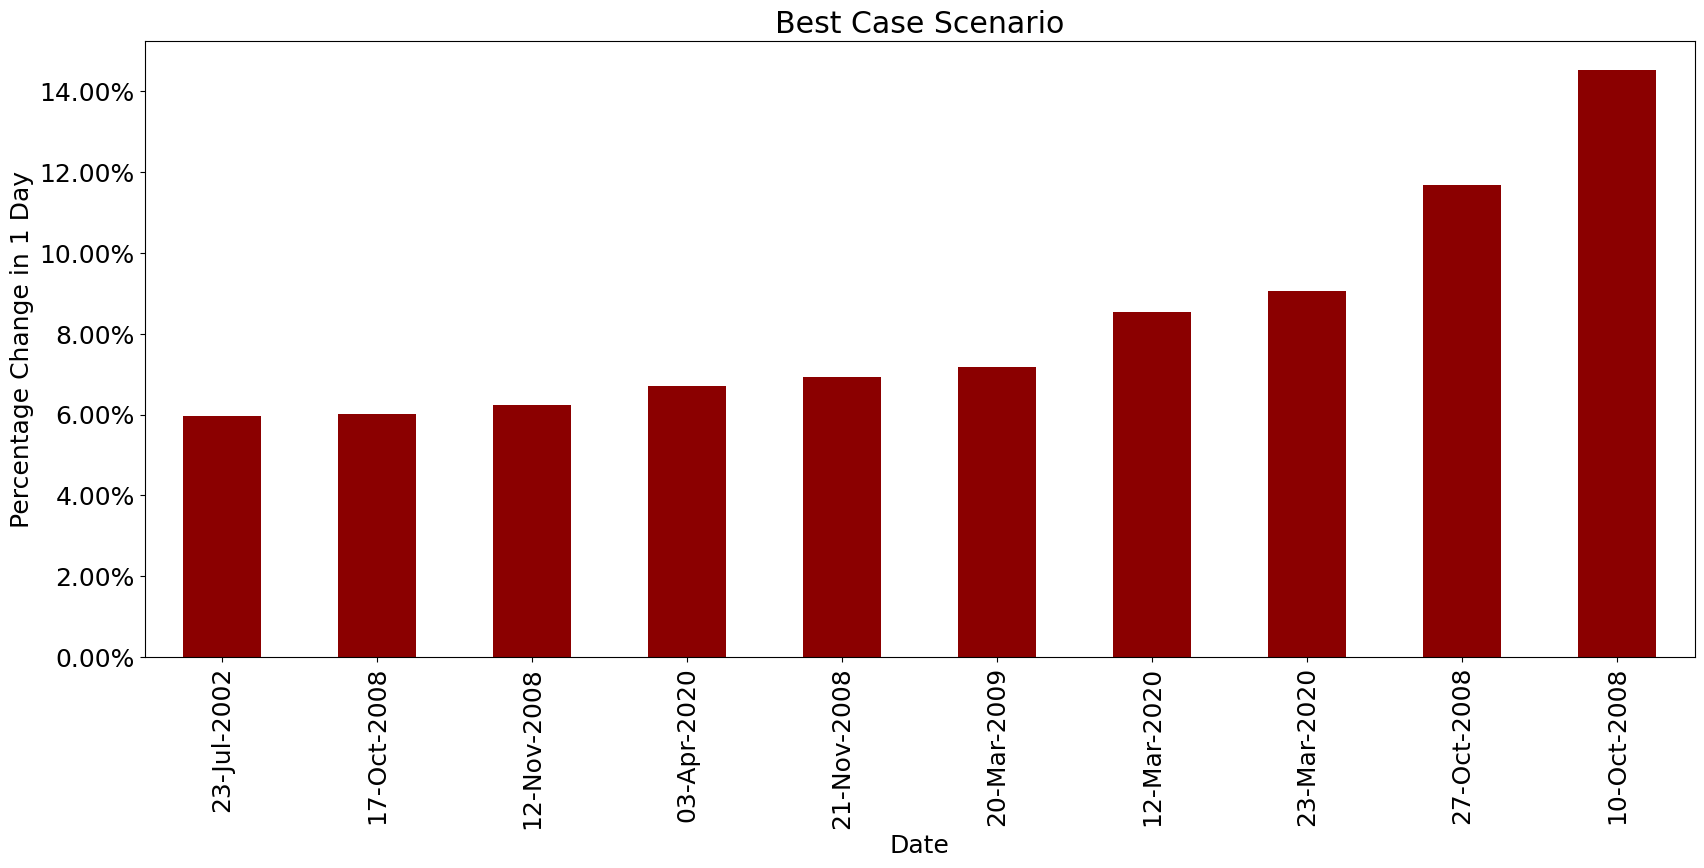

In [13]:
ax = df[df.perc_change_1day.notna()].sort_values('perc_change_1day').tail(10).plot(y = 'perc_change_1day', x = 'Date', kind = 'bar', color = 'darkred')
size = plt.gcf()
size.set_size_inches(20,8)

plt.ylabel('Percentage Change in 1 Day')
ax.get_legend().remove()

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

plt.title('Best Case Scenario')

plt.rcParams.update({'font.size': 18})
plt.savefig(fname = 'perc_change_1_day_top_best.jpeg', bbox_inches = 'tight')

##### 1 day percentage change 

/var/folders/97/42yy7pxx1lscf6t_dhpvrff80000gp/T/ipykernel_34231/1296522331.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])


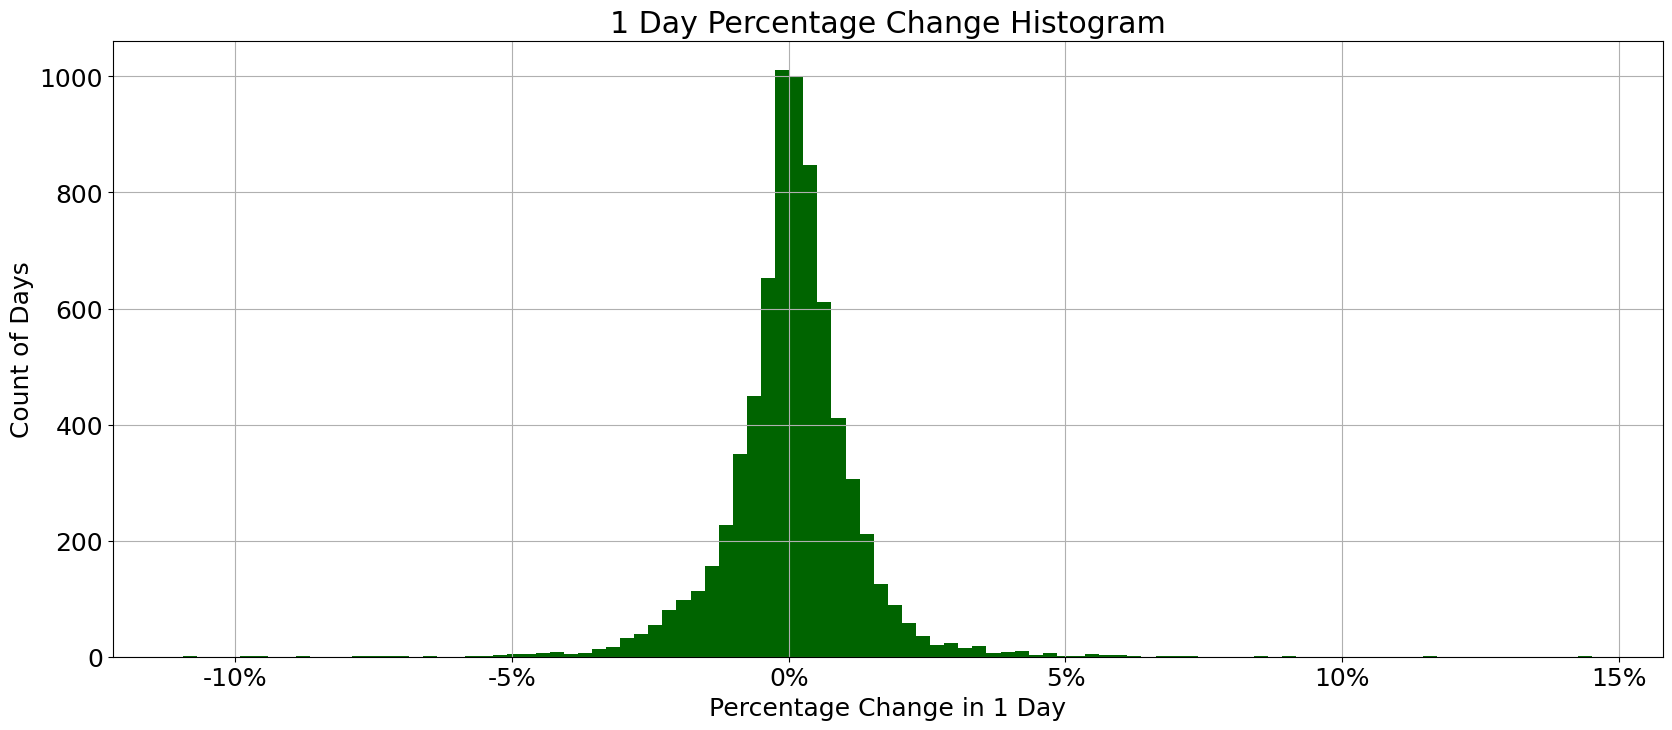

In [14]:
ax = df.perc_change_1day.hist(bins=100,  color = 'darkgreen')
size = plt.gcf()
size.set_size_inches(20,8)

vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])

plt.xlabel('Percentage Change in 1 Day')
plt.ylabel('Count of Days')

plt.title('1 Day Percentage Change Histogram')
plt.savefig(fname = 'perc_change_1_day_histogram.jpeg', bbox_inches = 'tight')

##### Probability of profits for 1 day

In [15]:
len(df[df.perc_change_1day > 0])/len(df[df.perc_change_1day.notna()])

0.5357391667827783

/var/folders/97/42yy7pxx1lscf6t_dhpvrff80000gp/T/ipykernel_34231/578046721.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])


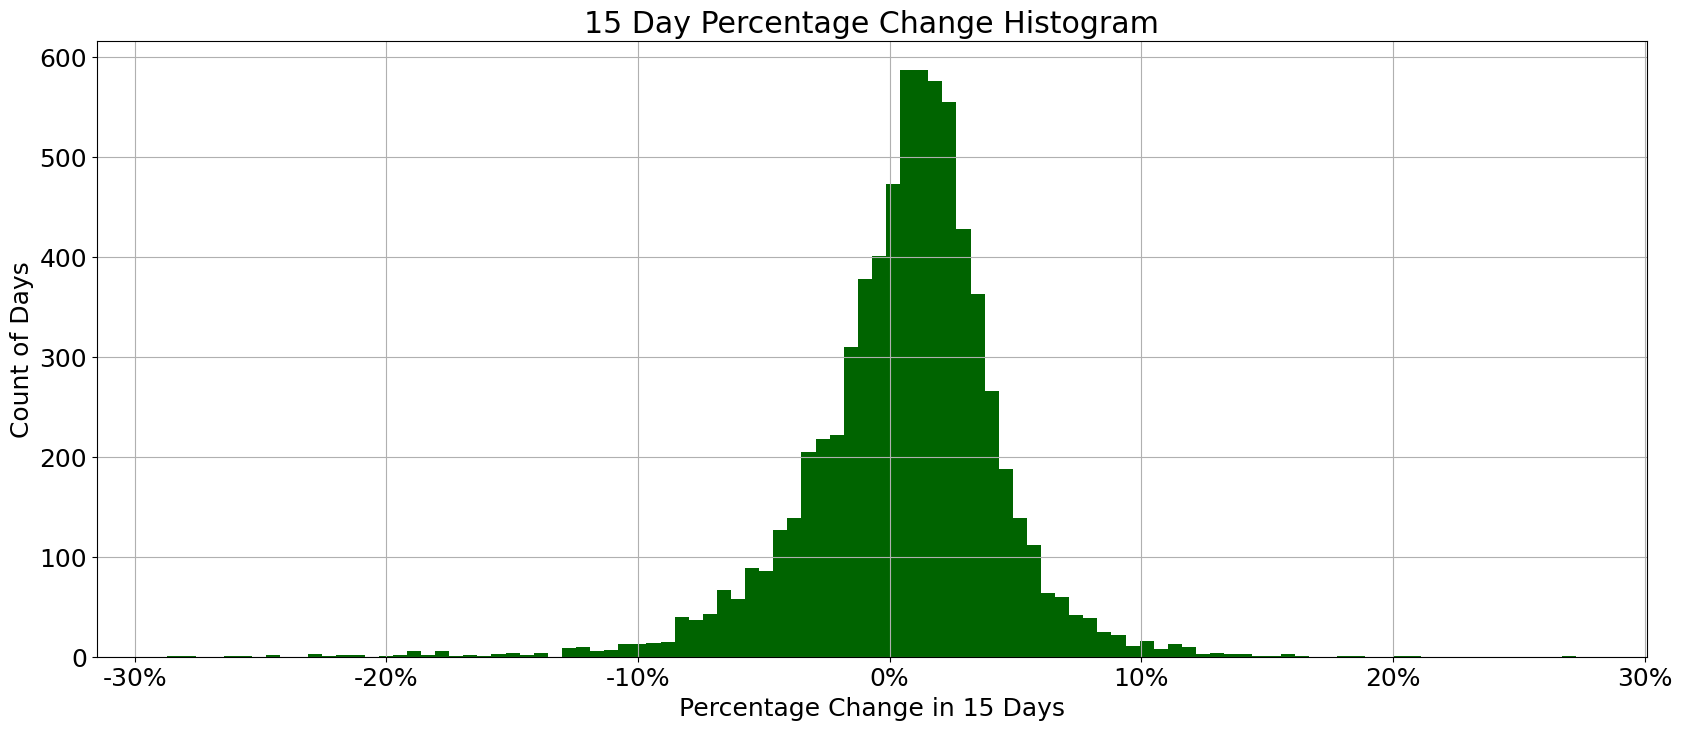

In [16]:
ax = df.perc_change_15day.hist(bins=100,  color = 'darkgreen')
size = plt.gcf()
size.set_size_inches(20,8)

vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])

plt.xlabel('Percentage Change in 15 Days')
plt.ylabel('Count of Days')

plt.title('15 Day Percentage Change Histogram')
plt.savefig(fname = 'perc_change_15_day_histogram.jpeg', bbox_inches = 'tight')

##### Probability of profits for 15 days

In [17]:
len(df[df.perc_change_15day > 0])/len(df[df.perc_change_15day.notna()])

0.6266927265112383

/var/folders/97/42yy7pxx1lscf6t_dhpvrff80000gp/T/ipykernel_34231/2395790328.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])


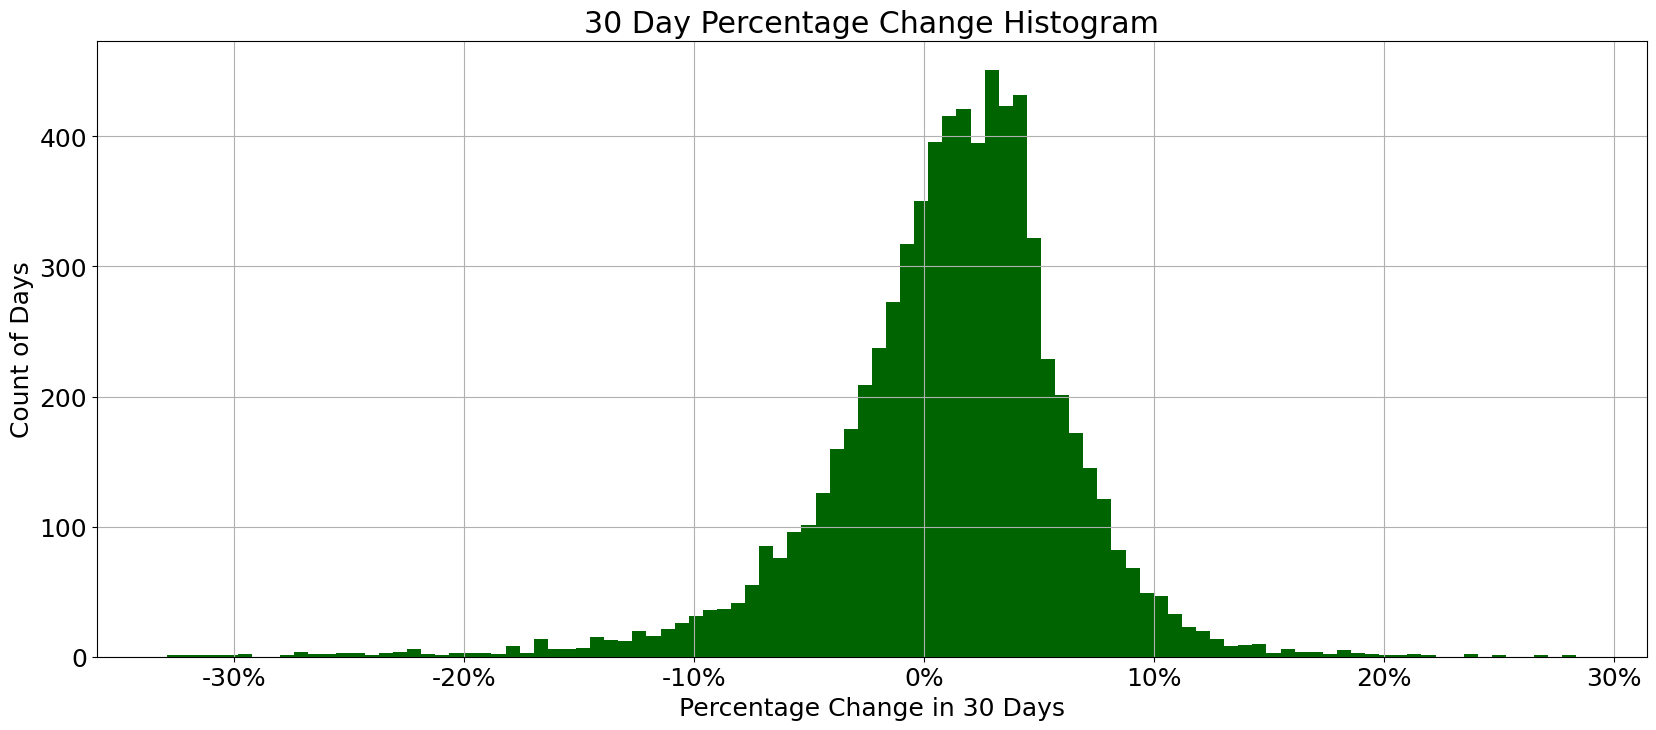

In [18]:
ax = df.perc_change_30day.hist(bins=100,  color = 'darkgreen')
size = plt.gcf()
size.set_size_inches(20,8)

vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])

plt.xlabel('Percentage Change in 30 Days')
plt.ylabel('Count of Days')

plt.title('30 Day Percentage Change Histogram')
plt.savefig(fname = 'perc_change_30_day_histogram.jpeg', bbox_inches = 'tight')

##### Probability of profits for 30 days

In [19]:
len(df[df.perc_change_30day > 0])/len(df[df.perc_change_30day.notna()])

0.6485730274202575

/var/folders/97/42yy7pxx1lscf6t_dhpvrff80000gp/T/ipykernel_34231/1445898637.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])


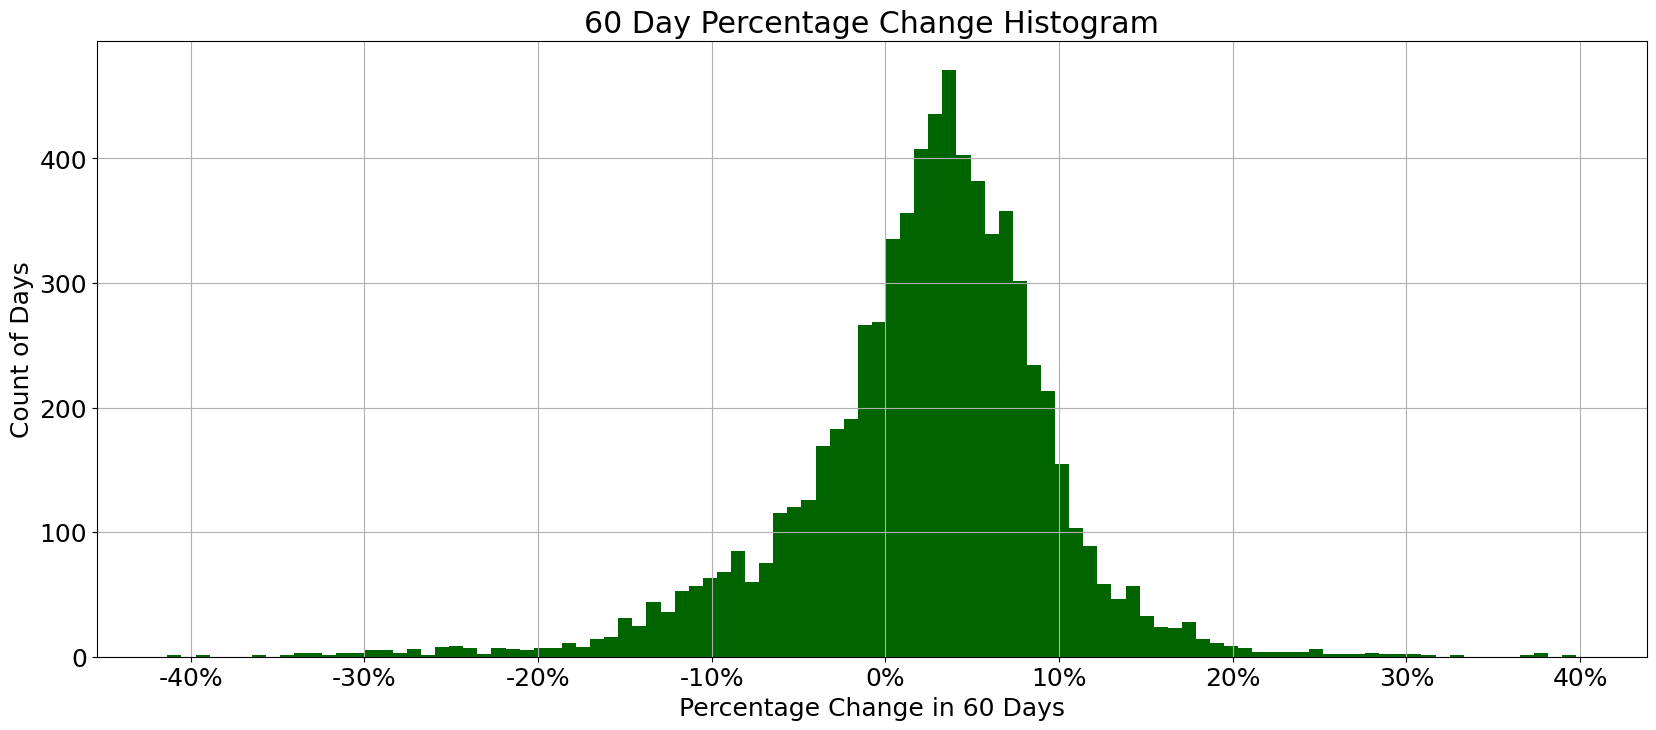

In [20]:
ax = df.perc_change_60day.hist(bins=100,  color = 'darkgreen')
size = plt.gcf()
size.set_size_inches(20,8)

vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])

plt.xlabel('Percentage Change in 60 Days')
plt.ylabel('Count of Days')

plt.title('60 Day Percentage Change Histogram')
plt.savefig(fname = 'perc_change_60_day_histogram.jpeg', bbox_inches = 'tight')

##### Probability of profits for 60 days

In [21]:
len(df[df.perc_change_60day > 0])/len(df[df.perc_change_60day.notna()])

0.6945771284068558

/var/folders/97/42yy7pxx1lscf6t_dhpvrff80000gp/T/ipykernel_34231/2894624067.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])


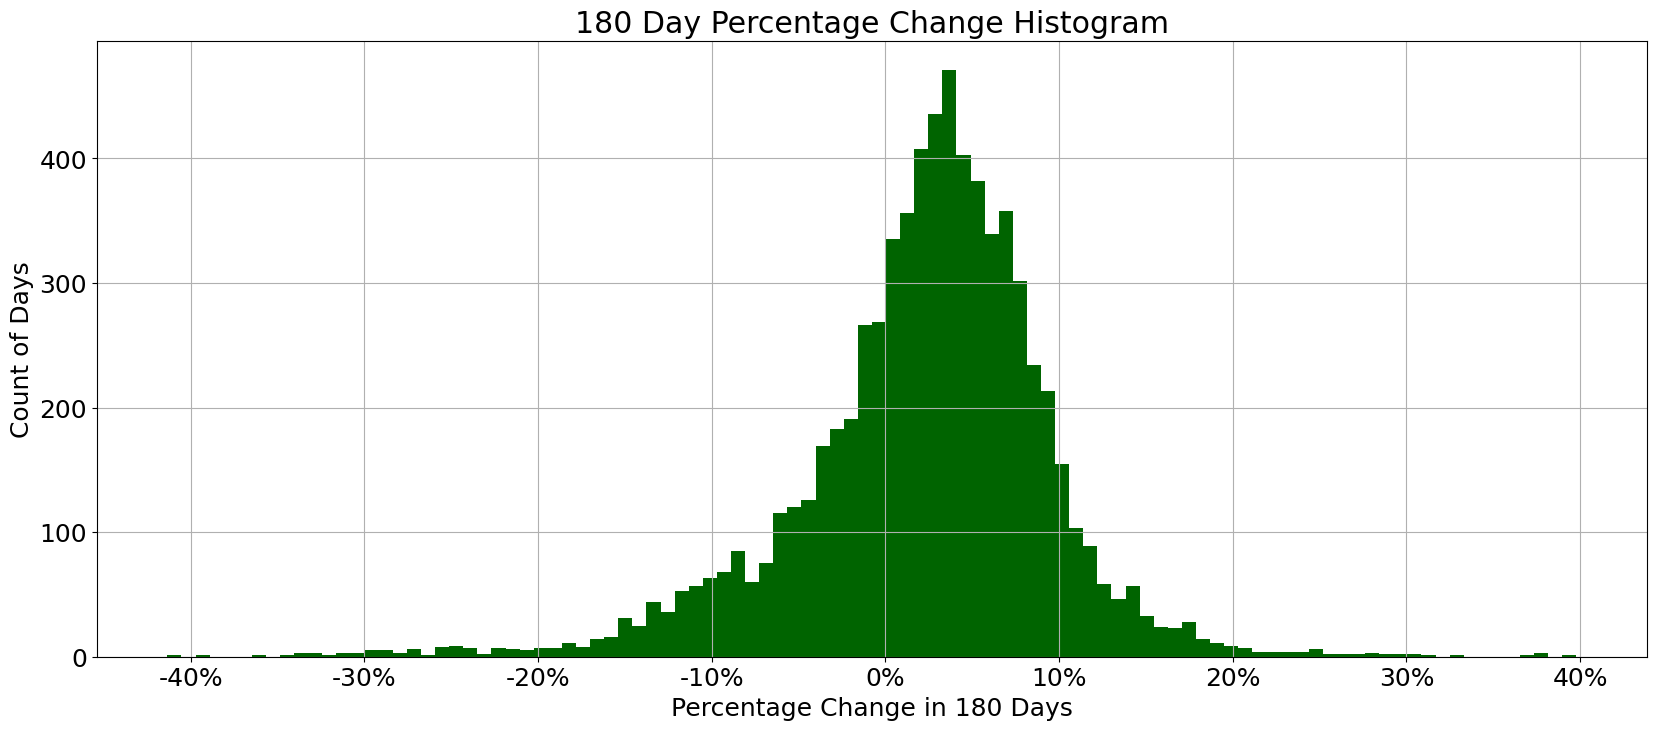

In [22]:
ax = df.perc_change_60day.hist(bins=100,  color = 'darkgreen')
size = plt.gcf()
size.set_size_inches(20,8)

vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])

plt.xlabel('Percentage Change in 180 Days')
plt.ylabel('Count of Days')

plt.title('180 Day Percentage Change Histogram')
plt.savefig(fname = 'perc_change_180_day_histogram.jpeg', bbox_inches = 'tight')

##### Probability of profits for 180 days

In [23]:
len(df[df.perc_change_180day > 0])/len(df[df.perc_change_180day.notna()])

0.7653615318662474

/var/folders/97/42yy7pxx1lscf6t_dhpvrff80000gp/T/ipykernel_34231/1684930466.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])


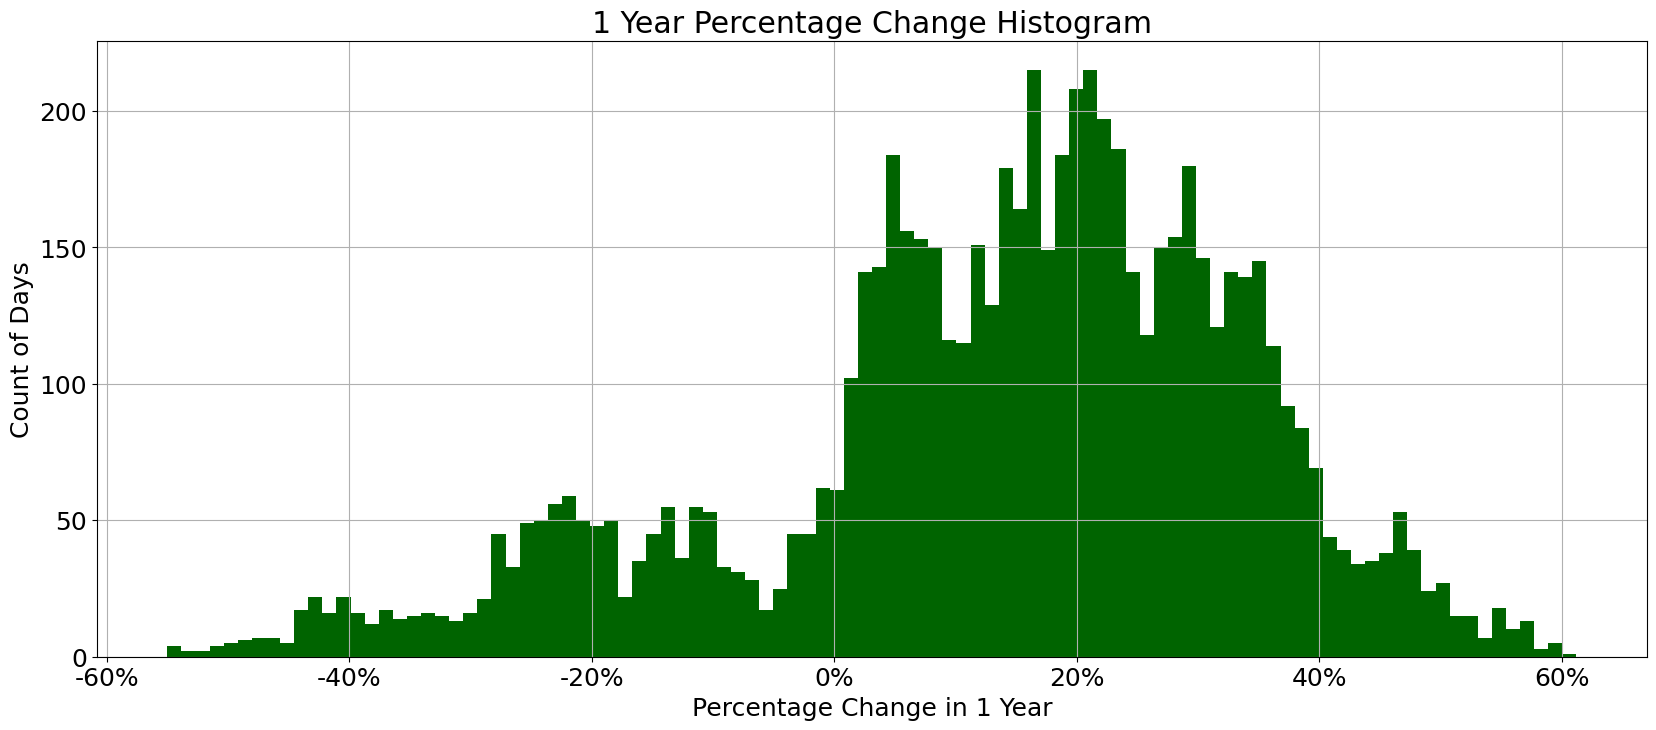

In [24]:
ax = df.perc_change_365day.hist(bins=100,  color = 'darkgreen')
size = plt.gcf()
size.set_size_inches(20,8)

vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])

plt.xlabel('Percentage Change in 1 Year')
plt.ylabel('Count of Days')

plt.title('1 Year Percentage Change Histogram')
plt.savefig(fname = 'perc_change_365_day_histogram.jpeg', bbox_inches = 'tight')

##### Probability of profits for 365 days

In [25]:
len(df[df.perc_change_365day > 0])/len(df[df.perc_change_365day.notna()])

0.8066930867459269

/var/folders/97/42yy7pxx1lscf6t_dhpvrff80000gp/T/ipykernel_34231/511608184.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])


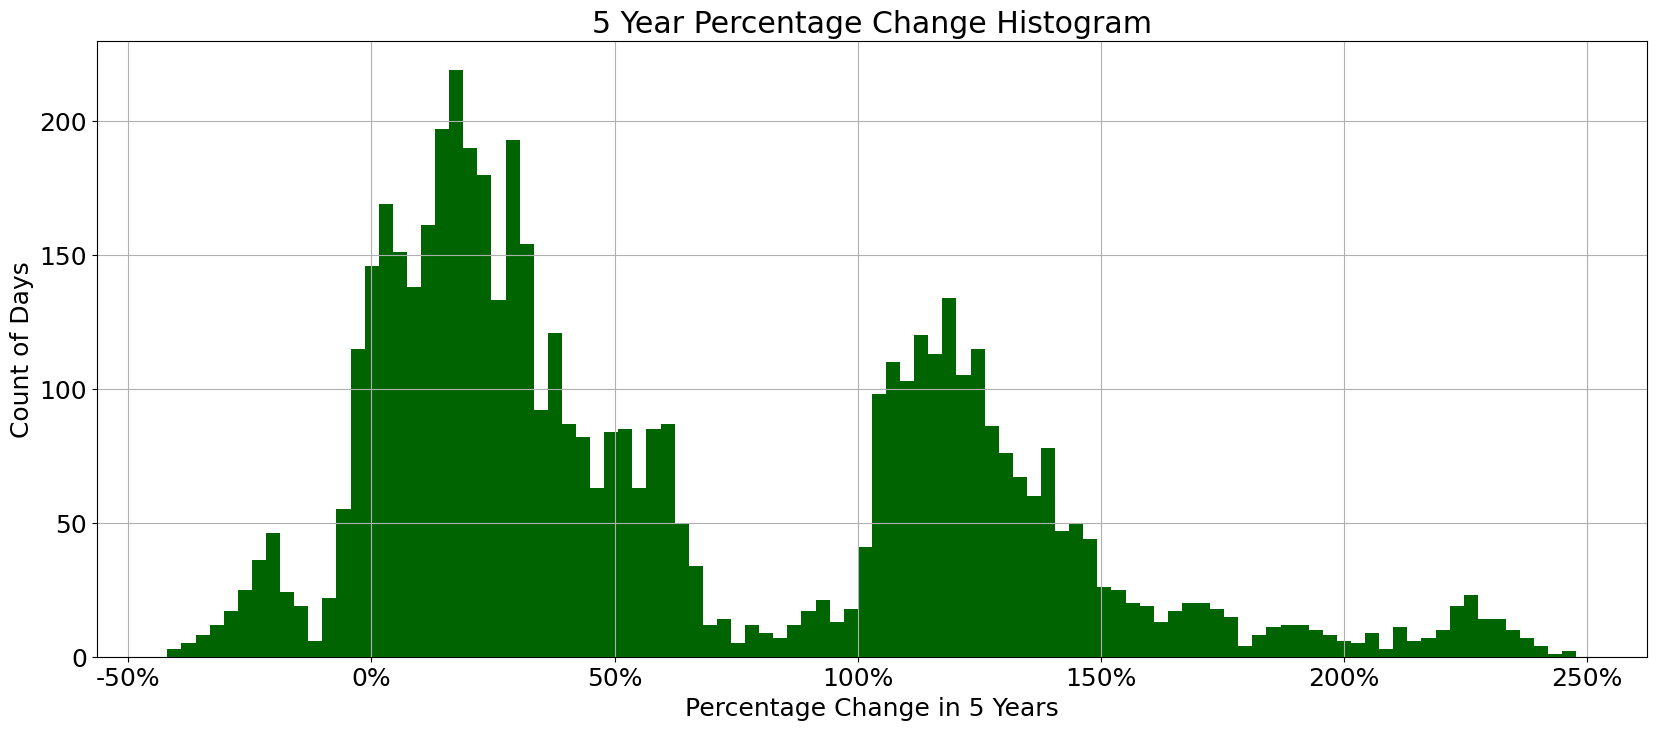

In [26]:
ax = df.perc_change_1825day.hist(bins=100,  color = 'darkgreen')
size = plt.gcf()
size.set_size_inches(20,8)

vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])

plt.xlabel('Percentage Change in 5 Years')
plt.ylabel('Count of Days')

plt.title('5 Year Percentage Change Histogram')
plt.savefig(fname = 'perc_change_1825_day_histogram.jpeg', bbox_inches = 'tight')




##### Probability of profits after 5 years

In [27]:
len(df[df.perc_change_1825day > 0])/len(df[df.perc_change_1825day.notna()])

0.9146273117877826